<font size="6" color="green" align="center"><b>CN6022 - Big Data Infrastructure and Manipulation</b></font><br>
<font size="4" color="purple" align="center"><b>Coursework - Group 1</b></font>
<b>
1. Ashmy Josy : u2247447
2. Ramya Panchatcharam : u2083209
3. Sharmila Shrestha : u1966188
</b>

### <font color='blue'><b>Task 1: Understanding Dataset – Air Flight Status</b></font>

This dataset contains all flight information, including cancellations and delays by airline, dating back to January 2018.

- <font color='green' size='3'><b>Airlines.csv:</b></font> The codes of airlines are described.
- <font color='green' size='3'><b>Combined_Flights_2022.csv:</b></font> It contains all flight information.
- <font color='green' size='3'><b>readme.html:</b></font> The features are described for Google Colab.



In [ ]:
# Install pyspark
!pip3 install pyspark # ONLY in Colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=592dbc25e725c8721c403a3d943f7fe9bdb109b0e2373c2b42405db795b7fa10
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# Import the SparkSession class from the pyspark.sql module in the PySpark library.
from pyspark.sql import SparkSession # SparkSession is the entry point to any Spark functionality and it support dataframe and spartcontext

In [ ]:
# Create a Spark session
spark = SparkSession.builder.appName("Combined_Flights").getOrCreate()

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read CSV file into a DataFrame
df = spark.read.csv("Combined_Flights_2022.csv", inferSchema=True, header=True)
# Show the first 20 rows of the DataFrame
df.show(10)

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|De

In [ ]:
# Check the dimensions
print(df.count(), len(df.columns)) # df.count - To determine number of row and len(df.coumns) determine number of columns

4078318 61


In [ ]:
# Check the schema(data types)
df.printSchema()

root
 |-- FlightDate: date (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |

In [ ]:
# Read CSV file into a DataFrame
df_a = spark.read.csv("Airlines.csv", inferSchema=True, header=True)
# Show the first 20 rows of the DataFrame
df_a.show(10)

+----+--------------------+
|Code|         Description|
+----+--------------------+
| 02Q|       Titan Airways|
| 04Q|  Tradewind Aviation|
| 05Q| Comlux Aviation, AG|
| 06Q|Master Top Linhas...|
| 07Q| Flair Airlines Ltd.|
| 09Q|      Swift Air, LLC|
| 0BQ|                 DCA|
| 0CQ|ACM AIR CHARTER GmbH|
| 0GQ|Inter Island Airw...|
| 0HQ|Polar Airlines de...|
+----+--------------------+
only showing top 10 rows



In [ ]:
# Check the schema(data types)
df_a.printSchema()

root
 |-- Code: string (nullable = true)
 |-- Description: string (nullable = true)



In [ ]:
# Check the dimensions
print(df_a.count(), len(df_a.columns))

1571 2


In [ ]:
#Summary Statistics
df.describe().show()

+-------+--------------------+-------+-------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-------+------------------+------------------+------------------+------------------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+------------------+------------------+------------------+--------------+-----------+------------------+---------------+------------------+-----------------+------------------+------------------+------------+---------+-----------------+-------------+-----------------+-------------------+--------------------+----------+------------------+-----------------+------------------+-----------------+------------------+-----

In [ ]:
# Create a temporary view for Combined_Flights_2022.csv dataframe
df.createOrReplaceTempView('Air_Flight')

In [ ]:
# Create a temporary view Airlines.csv dataframe
df_a.createOrReplaceTempView('Airlines')

In [ ]:
# Display first 10 records from Air_Flight view using Sparksql
sqlDF = spark.sql("SELECT * FROM Air_Flight LIMIT 10")
sqlDF.show()

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|De

In [ ]:
# # Display first 10 records from Airlines view using Sparksql
sqlDF1 = spark.sql("SELECT * FROM Airlines LIMIT 10")
sqlDF1.show()

+----+--------------------+
|Code|         Description|
+----+--------------------+
| 02Q|       Titan Airways|
| 04Q|  Tradewind Aviation|
| 05Q| Comlux Aviation, AG|
| 06Q|Master Top Linhas...|
| 07Q| Flair Airlines Ltd.|
| 09Q|      Swift Air, LLC|
| 0BQ|                 DCA|
| 0CQ|ACM AIR CHARTER GmbH|
| 0GQ|Inter Island Airw...|
| 0HQ|Polar Airlines de...|
+----+--------------------+



<font color='blue' size='5'><b>Task 2: Big Data Analysis using Spark SQL </b></font><br>



<font size="4" color="green" align="center"><b>Queries from Sharmila: u1966188 </b></font>

<font size="4" color="purple" align="center"><b>Query 1: Find the Airlines with the Most Diversions <b></font><br>

In [ ]:
# Execute SQL query and convert to Pandas DataFrame
diversions_df = spark.sql("""
    SELECT Airline, COUNT(*) AS Diversions
    FROM Air_Flight
    WHERE Diverted = 1
    GROUP BY Airline
    ORDER BY Diversions DESC
    LIMIT 7
""")
diversions_df .show()

+--------------------+----------+
|             Airline|Diversions|
+--------------------+----------+
|Southwest Airline...|       339|
|American Airlines...|       300|
|SkyWest Airlines ...|       268|
|Delta Air Lines Inc.|       187|
|United Air Lines ...|       161|
|     JetBlue Airways|       144|
|Alaska Airlines Inc.|       105|
+--------------------+----------+



The above spark SQL query on the Air_Flight dataset, selecting the airlines with the highest count of diversions. It filters for cases where flights were diverted (Diverted = 1), groups the data by airline, and orders the results by the number of diversions in descending order. The LIMIT 7 ensures that only the top 7 airlines with the most diversions are retrieved. Finally, the results are displayed using the show() method on the resulting PySpark DataFrame diversions_df.
- Objective: Identify and rank the top 7 airlines with the highest number of diversions. The query selects the 'Airline' column and counts the number of diversions for each airline.
- Grouping: The data is then grouped by the 'Airline' column, aggregating the count of diverted flights for each airline.
- Sorting: The grouped results are then sorted in descending order based on the count of diversions ('Diversions').

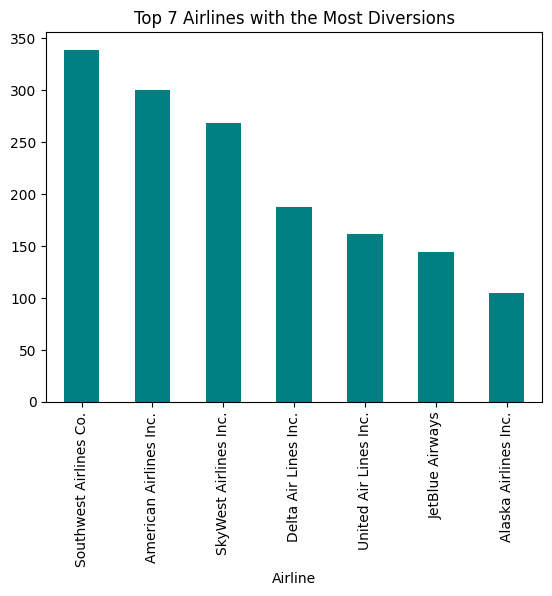

In [ ]:
import matplotlib.pyplot as plt
# Collect the data from the Spark DataFrame
pd_df = diversions_df.toPandas()

# Assuming diversions_df is a PySpark DataFrame
pandas_df = diversions_df.toPandas()

# Plotting using Pandas
pandas_df.plot.bar(x='Airline', y='Diversions', color='teal', legend=False)
plt.title('Top 7 Airlines with the Most Diversions')
plt.xlabel('Airline')
plt.show()


**Visualisation:**

The code takes data from a PySpark DataFrame, converts it to a Pandas DataFrame, creates a bar plot using Pandas, adds a title and labels, and then displays the plot using Matplotlib. The plot represents the top 7 airlines with the most diversions, with each airline represented by a teal-colored bar.



<font size="4" color="purple" align="center"><b>Query 2:Monthly Average Departure Delay by Airline and Origin <b></font><br>

In [ ]:
spark.sql("""
    SELECT Year, Month, Airline, Origin, AVG(DepDelay) AS AvgDepDelay
    FROM Air_Flight
    GROUP BY Year, Month, Airline, Origin
    ORDER BY AvgDepDelay DESC
    LIMIT 9
""").show()

+----+-----+--------------------+------+------------------+
|Year|Month|             Airline|Origin|       AvgDepDelay|
+----+-----+--------------------+------+------------------+
|2022|    4|         Comair Inc.|   RSW|            1130.0|
|2022|    2|   Republic Airlines|   OMA|             628.0|
|2022|    2|   Republic Airlines|   CLT|             399.0|
|2022|    2|   Republic Airlines|   VPS|             384.0|
|2022|    2|SkyWest Airlines ...|   ESC|132.78181818181818|
|2022|    4|American Airlines...|   BZN|119.11111111111111|
|2022|    2|SkyWest Airlines ...|   ROW|117.54545454545455|
|2022|    2|Capital Cargo Int...|   ABE|             114.0|
|2022|    4|   Endeavor Air Inc.|   OMA|106.36842105263158|
+----+-----+--------------------+------+------------------+



**Explanation of the code**

This SQL query retrieves data from the Air_Flight DataFrame. It calculates the average departure delay (AVG(DepDelay) AS AvgDepDelay) for each combination of Year, Month, Airline, and Origin. The results are grouped by these columns, ordered in descending order based on the average departure delay, and limited to the top 9 results.The show() method is invoked to display the results of the SQL query.

*   Objective: The query aims to retrieve and rank the top 9 combinations of Year, Month, Airline, and Origin based on the average departure delay.
*   Grouping: The results are grouped by 'Year', 'Month', 'Airline', and 'Origin', allowing for the calculation of average departure delays for each combination.
*   The grouped results are then ordered in descending order based on the average departure delay, and the output is limited to the top 9 combinations. The final result is displayed using the

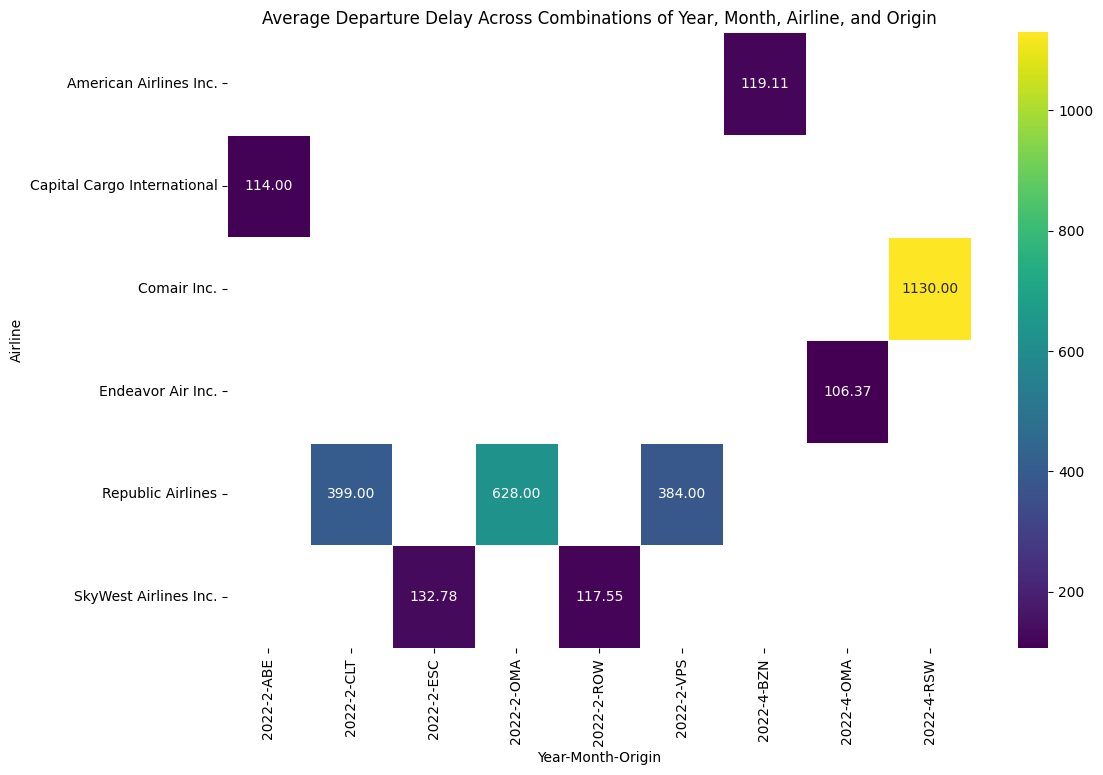

In [ ]:
#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

result_df = spark.sql("""
    SELECT Year, Month, Airline, Origin, AVG(DepDelay) AS AvgDepDelay
    FROM Air_Flight
    GROUP BY Year, Month, Airline, Origin
    ORDER BY AvgDepDelay DESC
    LIMIT 9
""").toPandas()

# Pivot the DataFrame for creating a heatmap
heatmap_df = result_df.pivot_table(index=['Airline'], columns=['Year', 'Month', 'Origin'], values='AvgDepDelay')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Departure Delay Across Combinations of Year, Month, Airline, and Origin')
plt.show()

**Visualisation:**

This code uses the seaborn and matplotlib libraries to create a heatmap for visualizing average departure delays across different combinations of Year, Month, Airline, and Origin.
Thecode executes a SQL query on the Air_Flight Spark DataFrame to calculate the average departure delay for different combinations. The results are then converted to a Pandas DataFrame named result_df. The pivot_table function is used to pivot the DataFrame result_df so that it becomes suitable for creating a heatmap. The rows are indexed by 'Airline', and columns are formed by combinations of 'Year', 'Month', and 'Origin'. The values in the cells are the average departure delays.The code sets up a figure with a size of 12x8 inches, then uses sns.heatmap to create the heatmap. Parameters like cmap define the color map ('viridis' in this case), annot=True adds the numeric values to the cells, fmt=".2f" formats the annotation to two decimal places, and linewidths=.5 adds grid lines. Finally, it sets the title and displays the heatmap using plt.show().


<font size="4" color="purple" align="center"><b>Query 3:Monthly Flight Distance Statistics <b></font><br>



In [ ]:
spark.sql("""
    SELECT Year, Month,
           MAX(Distance) AS MaxDistance,
           MIN(Distance) AS MinDistance,
           AVG(Distance) AS AvgDistance
    FROM Air_Flight
    GROUP BY Year, Month
""").show()

+----+-----+-----------+-----------+-----------------+
|Year|Month|MaxDistance|MinDistance|      AvgDistance|
+----+-----+-----------+-----------+-----------------+
|2022|    4|     5095.0|       31.0| 799.578329800617|
|2022|    2|     4502.0|       31.0|820.0029388742618|
+----+-----+-----------+-----------+-----------------+



**Explanation of the code**

This SQL query calculates summary statistics for the 'Distance' column based on the 'Year' and 'Month' columns. Specifically, it calculates the maximum distance (MAX(Distance) AS MaxDistance), minimum distance (MIN(Distance) AS MinDistance), and average distance (AVG(Distance) AS AvgDistance) for each unique combination of 'Year' and 'Month'.
*  Objective: The query aims to analyze the statistical measures (maximum, minimum, and average distance) of flights for each combination of Year and Month.
*   The results are grouped by 'Year' and 'Month', allowing for the computation of the specified aggregate measures for each unique combination.
*   MAX(Distance), MIN(Distance), and AVG(Distance) in a SQL query provides a overview of the statistical of flight distances, offering insights into the maximum, minimum, and average distances traveled for each combination of Year and Month in the 'Air_Flight' dataset.

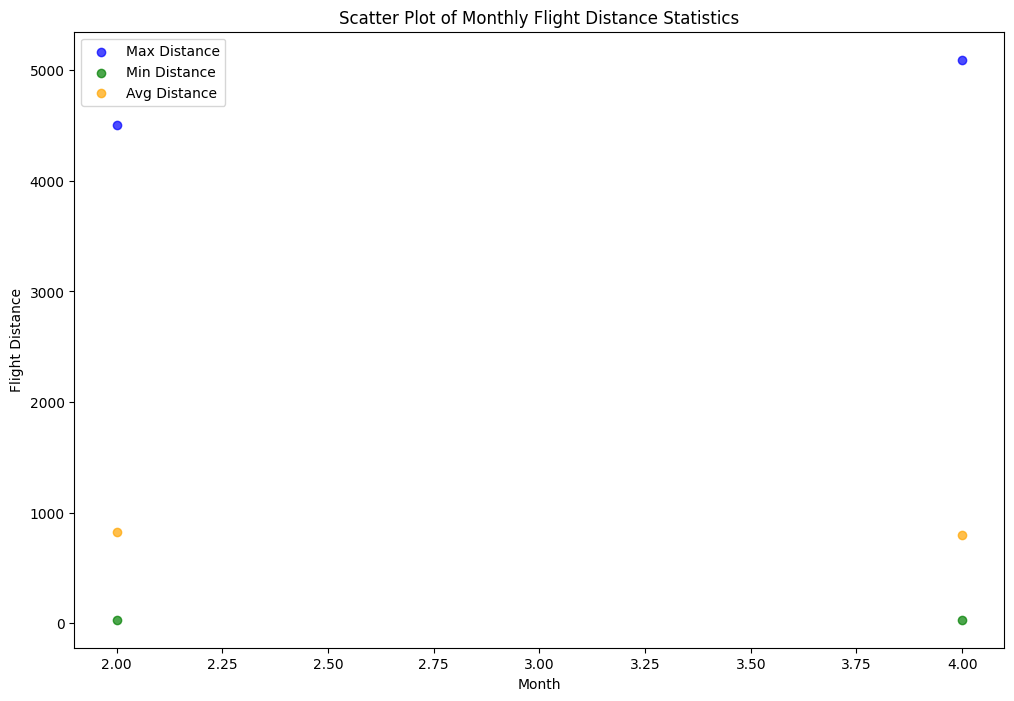

In [ ]:
result_df = spark.sql("""
    SELECT Year, Month,
           MAX(Distance) AS MaxDistance,
           MIN(Distance) AS MinDistance,
           AVG(Distance) AS AvgDistance
    FROM Air_Flight
    GROUP BY Year, Month
""").toPandas()

# Scatter plot for Maximum Distance
plt.figure(figsize=(12, 8))
plt.scatter(result_df['Month'], result_df['MaxDistance'], label='Max Distance', color='blue', alpha=0.7)

# Scatter plot for Minimum Distance
plt.scatter(result_df['Month'], result_df['MinDistance'], label='Min Distance', color='green', alpha=0.7)

# Scatter plot for Average Distance
plt.scatter(result_df['Month'], result_df['AvgDistance'], label='Avg Distance', color='orange', alpha=0.7)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Flight Distance')
plt.title('Scatter Plot of Monthly Flight Distance Statistics')
plt.legend()

**Visualisation:**

 - The code executes a SQL query to calculate maximum, minimum, and average distances for each unique combination of 'Year' and 'Month'. The result is then converted to a Pandas DataFrame named result_df.
 - This code creates three scatter plots on the same figure. Each scatter plot corresponds to one of the distance metrics: maximum distance, minimum distance, and average distance. The x-axis represents the months (result_df['Month']), and the y-axis represents the respective distances.
 - These lines "plt.xlabel('Month') plt.ylabel('Flight Distance') plt.title('Scatter Plot of Monthly Flight Distance Statistics')" set the x-axis label to 'Month', the y-axis label to 'Flight Distance', and the title of the plot to 'Scatter Plot of Monthly Flight Distance Statistics'. And, plt.legend() adds a length to the plot, indicating which color corresponds to each type of distance.*italicised text*

<font size="4" color="green" align="center"><b>Queries from Ashmy Josy: u2247447<b></font><br>

<font size="4" color="purple" align="center"><b>Query 1: To get the airlines with the top destination with the max delayed flights with the number of flights.
   <b></font><br>

In [ ]:
sqlDF = spark.sql(""" SELECT Airline, First(Dest) AS TopDelayedDestination, MAX(DelayedFlights) AS MaxDelayedFlights
        FROM (
        SELECT Airline, Dest, COUNT(*) AS DelayedFlights
        FROM Air_Flight
        WHERE DepDelayMinutes > 0
        GROUP BY Airline, Dest
    )
    GROUP BY Airline
    ORDER BY MaxDelayedFlights DESC
""")
sqlDF.show()

+--------------------+---------------------+-----------------+
|             Airline|TopDelayedDestination|MaxDelayedFlights|
+--------------------+---------------------+-----------------+
|Delta Air Lines Inc.|                  OAK|             7845|
|American Airlines...|                  HNL|             7060|
|Southwest Airline...|                  ROC|             5926|
|     JetBlue Airways|                  EWR|             3868|
|Alaska Airlines Inc.|                  EWR|             3459|
|SkyWest Airlines ...|                  DFW|             2402|
|United Air Lines ...|                  SFO|             2076|
|           Envoy Air|                  BUF|             1434|
|   Endeavor Air Inc.|                  RIC|             1375|
|         Horizon Air|                  SJC|             1294|
|         Comair Inc.|                  ILM|             1253|
|Hawaiian Airlines...|                  MCO|             1122|
|Frontier Airlines...|                  SLC|           


**Explanation of the code**
*   This SQL code helps to analyze the delayed data to find for each airline, the destination with the highest number of delayed flights and the corresponding maximum number of delayed flights.
*   There is a inner query and an outer query in this code
*   The inner query calculates the number of delayed flights for each combination of airline and destination. Filteration of rows is done where the departure delay is greater than 0.
*   The outer query takes the resulty of the inner query groups the results by airline and then performs additional aggregation functions to find the first destination with the maximum delayed flights and the maximum number of delayed slights for each airline.
*   The outer group by is used to perform aggregate functions on the data at the airline level.
*   Key Functions in this code is First(Dest) - selects the first destination for each airline with the macimum delayed flights.


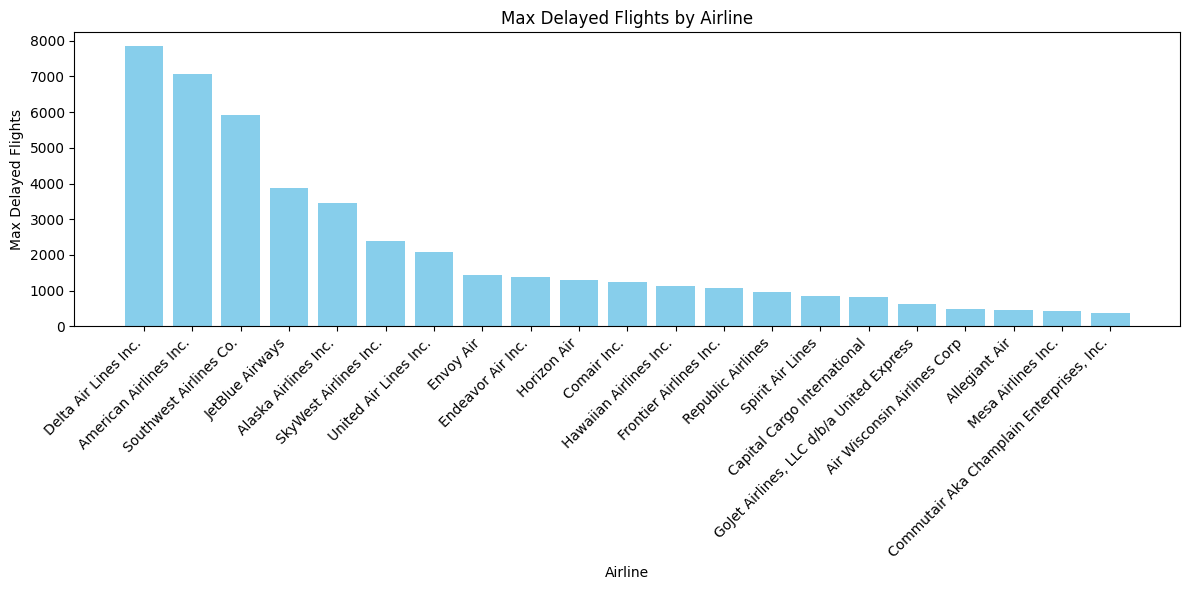

In [ ]:
# Collect the data from the Spark DataFrame
pd_df = sqlDF.toPandas()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(pd_df['Airline'], pd_df['MaxDelayedFlights'], color='skyblue')
plt.xlabel('Airline')
plt.ylabel('Max Delayed Flights')
plt.title('Max Delayed Flights by Airline')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Visualisation:**

The bar chart visualizes the maximum number of delayed flights for each airline, providing a clear comparison of the extent of delays across different airlines based on the data extracted from the Spark DataFrame and converted to a Pandas DataFrame.

<font size="4" color="purple" align="center"><b>Query 2: Number of cancelled flights per Airlines with the cancellation rate by calculating with the toatal flights
   <b></font><br>

In [ ]:
sqlDF = spark.sql("""
    SELECT Airline,
        SUM(CAST(Cancelled AS INT)) AS TotalCancelledFlights,
        COUNT(*) AS TotalFlights,
        (SUM(CAST(Cancelled AS INT)) / COUNT(*)) AS CancellationRate
    FROM Air_Flight
    GROUP BY Airline
    ORDER BY CancellationRate DESC
""")
sqlDF.show()

+--------------------+---------------------+------------+--------------------+
|             Airline|TotalCancelledFlights|TotalFlights|    CancellationRate|
+--------------------+---------------------+------------+--------------------+
|    Spirit Air Lines|                 1920|       18653| 0.10293250415482764|
|     JetBlue Airways|                 3211|       44720| 0.07180232558139535|
|American Airlines...|                 6712|      132044|0.050831541001484355|
|Alaska Airlines Inc.|                 1301|       35330| 0.03682422870082083|
|Frontier Airlines...|                  438|       12203|0.035892813242645254|
|GoJet Airlines, L...|                  151|        4635|  0.0325782092772384|
|Southwest Airline...|                 5595|      179552| 0.03116088932454108|
|       Allegiant Air|                  310|       10542| 0.02940618478467084|
|Capital Cargo Int...|                  396|       15250|0.025967213114754098|
|   Endeavor Air Inc.|                  980|       3

**Explanation of the Code**

*   The objective of this SQL code is to analyze and report statistics related to flight cancellations for different airlines using the Air_Flight DataFrame.
*   SUM(CAST(Cancelled AS INT)) AS TotalCancelledFlights: Calculates the total number of cancelled flights for each airline. The CAST function is used to convert the "Cancelled" column, a string column indicating cancellation status, to an integer for summation.
*   CancellationRate: Computes the cancellation rate by dividing the total number of cancelled flights by the total number of flights for each airline.
*  Groups the results by the unique values in the "Airline" column
*   ORDER BY CancellationRate DESC: Order the results in descending order based on the calculated CancellationRate.





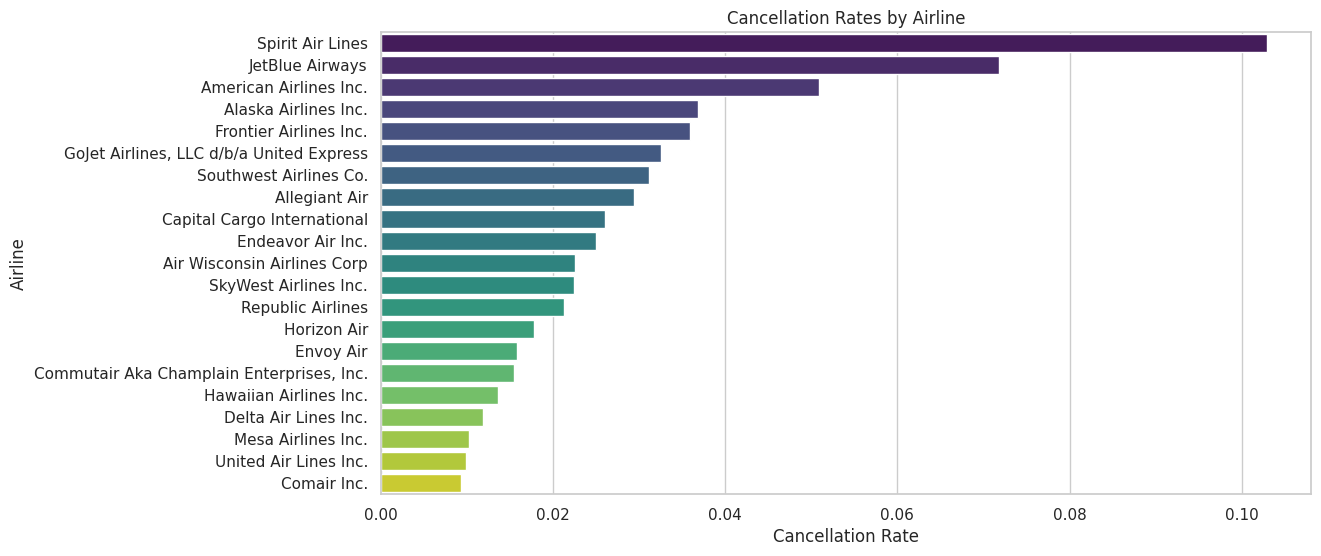

In [ ]:
# Collect the data from the Spark DataFrame
pd_df = sqlDF.toPandas()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="CancellationRate", y="Airline", data=pd_df, palette="viridis")
plt.title('Cancellation Rates by Airline')
plt.xlabel('Cancellation Rate')
plt.ylabel('Airline')
plt.show()

**Visualisation:**


The visualization is a horizontal bar chart that illustrates the cancellation rates for different airlines. Each bar corresponds to a specific airline, and its length represents the calculated cancellation rate for that airline based on the data obtained from the Spark DataFrame. This visualization provides a clear and concise representation of the relative cancellation rates across different airlines, making it easy to identify trends or variations in airline performance.

<font size="4" color="purple" align="center"><b>Query 3: To get the destinations of each airport
   <b></font><br>

In [ ]:
sqlDF = spark.sql("""
    SELECT Origin AS Airport, COUNT(DISTINCT Dest) AS UniqueDestinations
    FROM Air_Flight
    GROUP BY Airport
    ORDER BY UniqueDestinations DESC
    """)
sqlDF.show()

+-------+------------------+
|Airport|UniqueDestinations|
+-------+------------------+
|    DFW|               180|
|    DEN|               173|
|    ORD|               165|
|    ATL|               150|
|    CLT|               136|
|    LAS|               122|
|    MSP|               108|
|    PHX|               106|
|    IAH|               105|
|    DTW|                96|
|    LAX|                95|
|    DCA|                93|
|    SEA|                91|
|    FLL|                89|
|    MCO|                87|
|    SLC|                82|
|    EWR|                81|
|    PHL|                81|
|    BNA|                79|
|    AUS|                78|
+-------+------------------+
only showing top 20 rows



**Explanation of the code**
*  This query selects the origin airport from the dataset to get the number of unique destinations.
*   Presents the order in a descending order
*   Group By is used here for the origin airport so the count is calculated for each unique origin airport
*   ORDER BY UniqueDestinations DESC: Order the results in descending order based on the count of unique destinations.
*   COUNT(DISTINCT Dest) AS UniqueDestinations: Count the distinct values in the Dest column and rename the result as UniqueDestinations.



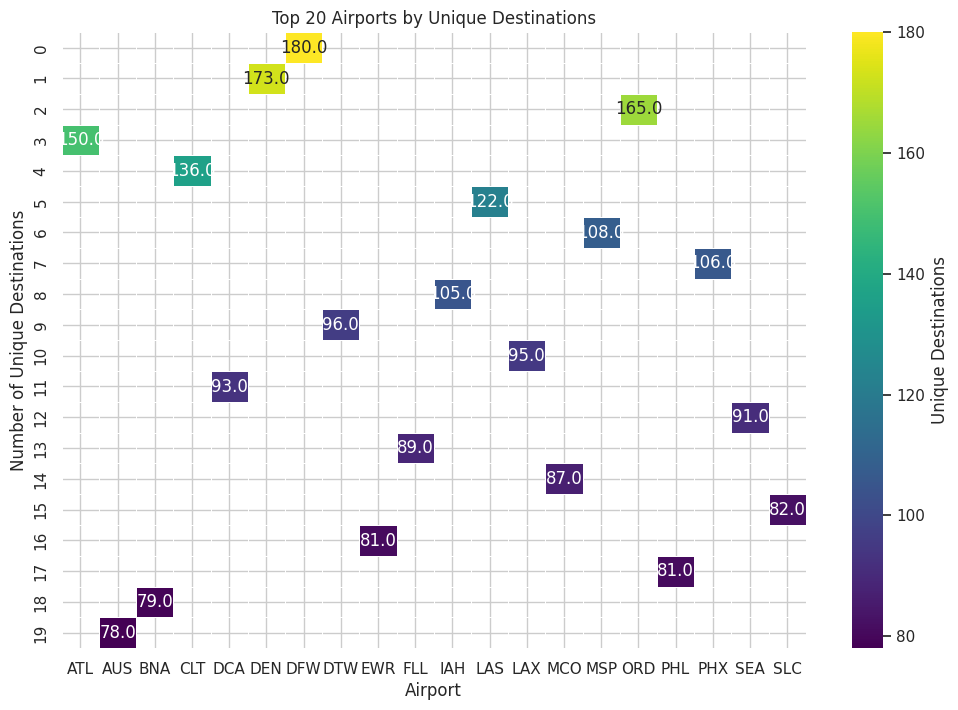

In [ ]:
# Select the top 20 airports
top_airports_df = sqlDF.limit(20).toPandas()

# Pivot the DataFrame to get a matrix of Airport vs. UniqueDestinations
heatmap_data = top_airports_df.pivot(index=None, columns='Airport', values='UniqueDestinations')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Unique Destinations'})

# Set plot labels and title
plt.xlabel('Airport')
plt.ylabel('Number of Unique Destinations')
plt.title('Top 20 Airports by Unique Destinations')

# Show the plot
plt.show()

**Visualisation:**

The heatmap visualizes the top 20 airports by the count of unique destinations they connect to. Extracted from a Spark DataFrame, the data is transformed into a matrix where rows represent airports and columns represent unique destinations. Using the "viridis" color map, the intensity of colors signifies the count of unique destinations, providing a quick overview of connectivity patterns. Annotations display precise counts. This visualization efficiently highlights major airports with diverse connectivity, aiding in the identification of key hubs.

<font size="4" color="blue" align="center"><b>Spark SQL Queries from Ramya Panchatcharam: u2083209</b></font><br>

<font size="3" color="purple" align="center"><b>Query 1: To find the average departure delay for each airline in the year 2022, and only include flights that were not canceled. </b></font>

<font size="3" color="green" align="center"><b>Spark sql Query</b></font>

In [ ]:
# pyspark query for to find avg. departure delay for all airline in 2022
sqlDF = spark.sql(""" SELECT a.Description AS Airline,  AVG(cf.DepDelayMinutes) AS AvgDepartureDelay
                          FROM Air_Flight cf
                          JOIN Airlines a ON cf.Airline = a.Description
                          WHERE cf.Year = 2022 AND cf.Cancelled = false
                          GROUP BY a.Description
                          ORDER BY AvgDepartureDelay DESC
                      """)

# Show the result
sqlDF.show(truncate=False)



+-----------------------------------------+------------------+
|Airline                                  |AvgDepartureDelay |
+-----------------------------------------+------------------+
|JetBlue Airways                          |28.99634625440796 |
|Frontier Airlines Inc.                   |23.524519368040355|
|Allegiant Air                            |22.688315182756718|
|GoJet Airlines, LLC d/b/a United Express |20.148435327916964|
|Mesa Airlines Inc.                       |18.825475252115453|
|Spirit Air Lines                         |18.36961043116551 |
|American Airlines Inc.                   |17.66887809948095 |
|Comair Inc.                              |16.853661526204103|
|United Air Lines Inc.                    |16.3657202669109  |
|Commutair Aka Champlain Enterprises, Inc.|16.308548624238604|
|Southwest Airlines Co.                   |15.947452998973045|
|SkyWest Airlines Inc.                    |14.960935761957732|
|Republic Airlines                        |14.773359435


* The above  Spark SQL, analyzing data from the 'Air_Flight' dataset for the year 2022. It computes the average departure delay, filtering out cancelled flights, and associates the results with the corresponding airlines using a JOIN operation with the 'Airlines' dataset.
* The final output, stored in the 'sqlDF' DataFrame, includes columns for airline names ('Airline') and their respective average departure delays ('AvgDepartureDelay').
* The results are then displayed using the 'show()' method, presenting the data in descending order based on the calculated average departure delays. <br>

*This analysis provides valuable insights into the performance of different airlines in terms of departure delays during the specified time frame*.

<font size="3" color="blue" align="center"><b>Visualization of my finding</b></font>

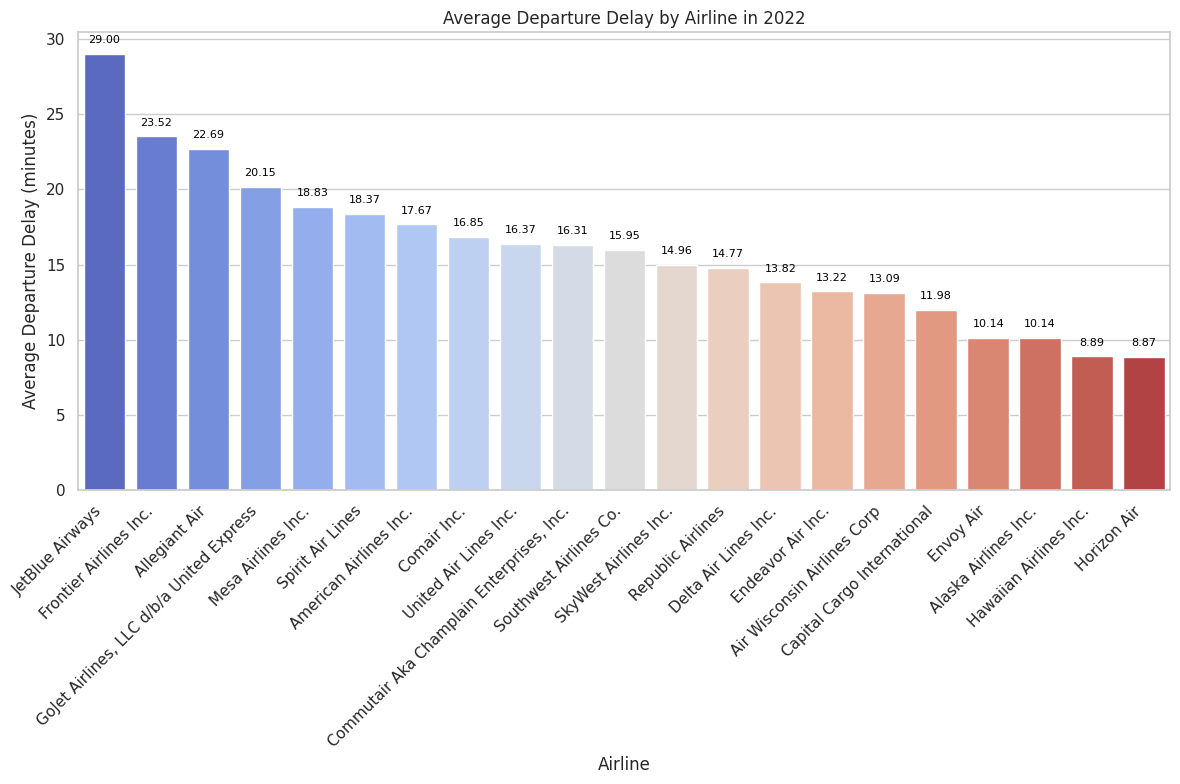

In [ ]:
# To find the average departure delay for each airline in the year 2022, and only include flights that were not canceled data Visualation
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = sqlDF.toPandas()

# Choose a different color palette, e.g., 'coolwarm'
color_palette = 'coolwarm'

# Set Seaborn style
sns.set(style="whitegrid")

# Plotting using Matplotlib and Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Airline', y='AvgDepartureDelay', data=pandas_df, palette=color_palette)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Airline in 2022')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


* The above data visualization to showcase the average departure delay for each airline in the year 2022, specifically focusing on flights that were not canceled.
* Firstly, the Spark DataFrame ('sqlDF') is converted into a Pandas DataFrame ('pandas_df') for ease of handling in Python. Subsequently, a horizontal bar plot is generated using Matplotlib and Seaborn, with each bar representing an airline and its corresponding average departure delay.
* The choice of a 'coolwarm' color palette enhances the visual appeal. Additionally, precise values are annotated on top of each bar for clarity.<br>

*The resulting visualization offers a comprehensive overview of the comparative departure delays among different airlines in 2022, emphasizing non-canceled flights and providing a clear and insightful representation of the data*.

<font size="4" color="purple" align="center"><b>Query 2: Busiest Days for Each Airline (Distinct Airline-FlightDate Pairs)</b></font><br>

<font size="3" color="green" align="center"><b>Spark sql Query</b></font>

In [ ]:
# Airline with the Maximum Number of Flights on a Single Day
sqlDF = spark.sql("""SELECT a.Description AS Airline, MAX(f.FlightOnDay) AS MaxFlightsOnDay
                      FROM (
                          SELECT DISTINCT Airline, FlightDate, COUNT(*) AS FlightOnDay
                          FROM Air_Flight
                          GROUP BY Airline, FlightDate
                      ) f
                      JOIN Airlines a ON f.Airline = a.Description
                      GROUP BY a.Description
                      ORDER BY MaxFlightsOnDay DESC
                  """)
sqlDF.show(truncate=False)


+-----------------------------------------+---------------+
|Airline                                  |MaxFlightsOnDay|
+-----------------------------------------+---------------+
|Southwest Airlines Co.                   |3904           |
|Delta Air Lines Inc.                     |2701           |
|American Airlines Inc.                   |2570           |
|SkyWest Airlines Inc.                    |2314           |
|United Air Lines Inc.                    |1856           |
|Republic Airlines                        |1083           |
|JetBlue Airways                          |865            |
|Endeavor Air Inc.                        |845            |
|Envoy Air                                |817            |
|Comair Inc.                              |730            |
|Alaska Airlines Inc.                     |695            |
|Spirit Air Lines                         |687            |
|Allegiant Air                            |507            |
|Frontier Airlines Inc.                 

* The above Spark SQL query aims to identify the airline with the highest number of flights on a single day. In the inner query, a subquery is used to calculate the count of distinct flights for each airline on specific days. The results are then grouped by 'Airline' and 'FlightDate'. The outer query takes the outcome of the subquery, aliasing it as 'f', and joins it with the 'Airlines' table using the condition 'f.Airline = a.Description'. This connection allows for obtaining the airline descriptions.
* The output of the query includes two main columns: 'Airline', representing the airline descriptions sourced from the 'Airlines' table, and 'MaxFlightsOnDay', which indicates the maximum number of flights on a single day for each airline.
* The results are grouped by airline description and ordered in descending order based on the maximum flights observed.
* Finally, the `sqlDF.show()` command is used to display the final results stored in the 'sqlDF' DataFrame.

*This analysis provides insights into the busiest days for each airline, showcasing the peak daily flight activity and aiding in the assessment of overall operational efficiency.*


<font size="3" color="blue" align="center"><b>Visualization of my finding</b></font>

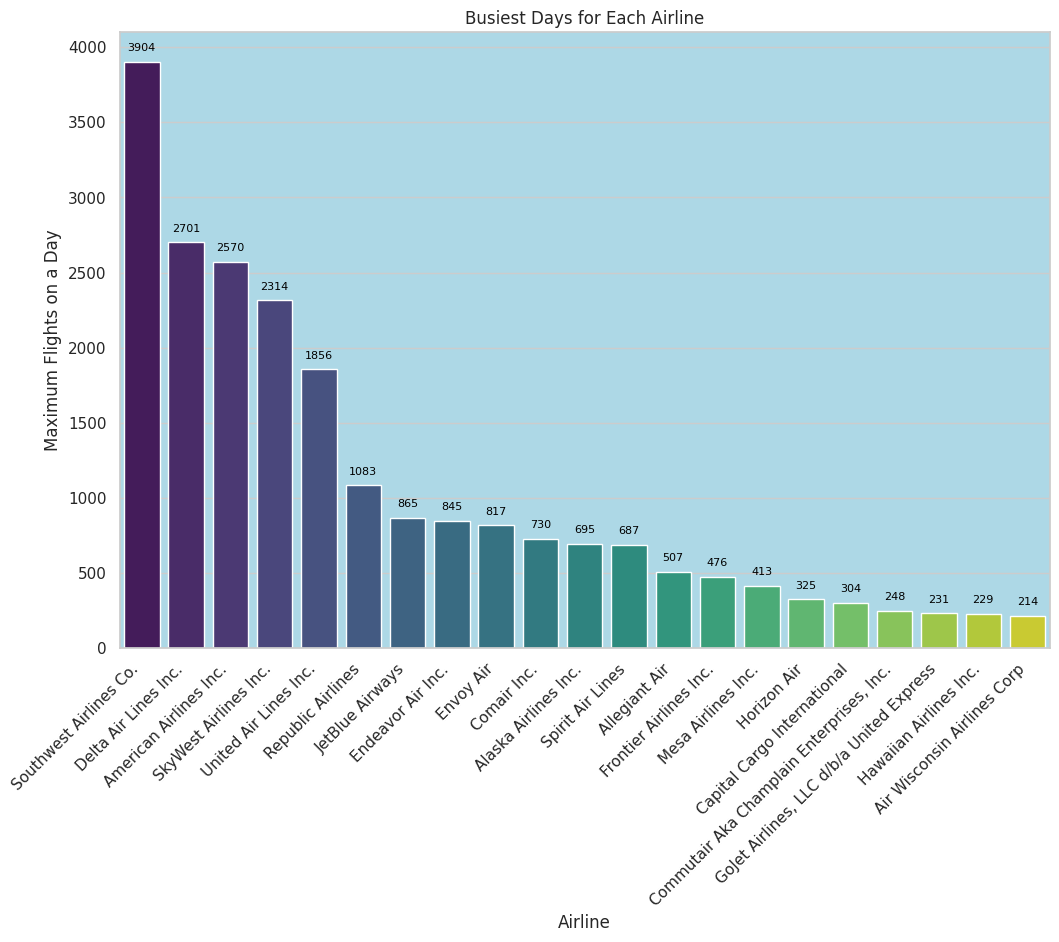

In [ ]:
# Convert Spark DataFrame to Pandas DataFrame
pd_df = sqlDF.toPandas()

# Plotting using Seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Airline', y='MaxFlightsOnDay', data=pd_df, palette='viridis', order=pd_df.sort_values('MaxFlightsOnDay', ascending=False)['Airline'])

# Customize the plot
bar_plot.set(xlabel="Airline", ylabel="Maximum Flights on a Day",
             title="Busiest Days for Each Airline")

# Set the color for the entire plot to a light blue
bar_plot.set_facecolor('#ADD8E6')  # Hexadecimal color for light blue

# Add exact values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


* The above data visualization to showcase 'Busiest Days for Each Airline (Distinct Airline-FlightDate Pairs)' for that first transforms a Spark DataFrame ('sqlDF') into a Pandas DataFrame ('pd_df'). Subsequently, a bar plot is created using Seaborn, displaying the maximum number of flights on a single day for each airline.
* The bars are ordered based on the maximum flights in descending order, and each bar is customized with a light blue color. Precise values are annotated on top of each bar, providing a clear representation of the busiest days for each airline. The visualization is designed for easy interpretation, with rotated x-axis labels to enhance readability. <br>

*This analysis aids in identifying and comparing the peak daily flight activities of different airlines, offering valuable insights into their operational intensity and performance.*

<font size="4" color="purple" align="center"><b>Query 3: Most popular routes by origin airport  </b></font><br>

<font size="3" color="green" align="center"><b>Spark sql Query</b></font>

In [ ]:
# Calculating Ranks with ROW_NUMBER() Over Partition using a subquery
sqlDF = spark.sql('''
    SELECT Origin, Dest, nb_flights,
           ROW_NUMBER() OVER (PARTITION BY Origin ORDER BY nb_flights DESC) AS rank
    FROM (
        SELECT Origin, Dest, COUNT(*) AS nb_flights
        FROM Air_Flight
        GROUP BY 1, 2
    ) AS subquery
''')

sqlDF.show()

+------+----+----------+----+
|Origin|Dest|nb_flights|rank|
+------+----+----------+----+
|   ABE| ORD|       722|   1|
|   ABE| CLT|       558|   2|
|   ABE| ATL|       526|   3|
|   ABE| DTW|       356|   4|
|   ABE| SFB|       346|   5|
|   ABE| PIE|       163|   6|
|   ABE| IAD|       153|   7|
|   ABE| PGD|       123|   8|
|   ABE| SRQ|        68|   9|
|   ABE| MYR|        61|  10|
|   ABE| FLL|        60|  11|
|   ABE| BNA|        43|  12|
|   ABE| SAV|        18|  13|
|   ABI| DFW|      1131|   1|
|   ABQ| PHX|      1474|   1|
|   ABQ| DEN|      1328|   2|
|   ABQ| LAX|      1312|   3|
|   ABQ| DFW|      1279|   4|
|   ABQ| DAL|       804|   5|
|   ABQ| IAH|       665|   6|
+------+----+----------+----+
only showing top 20 rows



In [ ]:
# Filter the DataFrame to include only the top-ranked routes for each origin
most_popular_routes = sqlDF.filter(sqlDF['rank'] == 1).limit(10)

# Show the result
most_popular_routes.show()


+------+----+----------+----+
|Origin|Dest|nb_flights|rank|
+------+----+----------+----+
|   ABE| ORD|       722|   1|
|   ABI| DFW|      1131|   1|
|   ABQ| PHX|      1474|   1|
|   ABR| MSP|       424|   1|
|   ABY| ATL|       564|   1|
|   ACK| JFK|       274|   1|
|   ACT| DFW|       997|   1|
|   ACV| SFO|       633|   1|
|   ACY| MCO|       429|   1|
|   ADK| ANC|        61|   1|
+------+----+----------+----+



* The above Spark SQL to calculate ranks with the ROW_NUMBER() function over partitions, employing a subquery structure. Specifically, it determines the rank of each destination ('Dest') within its corresponding origin ('Origin') based on the count of flights ('nb_flights').
* The results are stored in the 'sqlDF' DataFrame, which includes columns for origin, destination, flight count, and the calculated rank. Subsequently, the code filters 'sqlDF' to include only the top-ranked routes for each origin, limiting the results to the top 10 routes.
* The final output is displayed using the 'show()' method, offering insights into the most popular routes for each origin based on the calculated ranks.<br>

*This analysis aids in identifying and prioritizing significant routes within the dataset.*

<font size="3" color="blue" align="center"><b>Visualization of my finding</b></font>

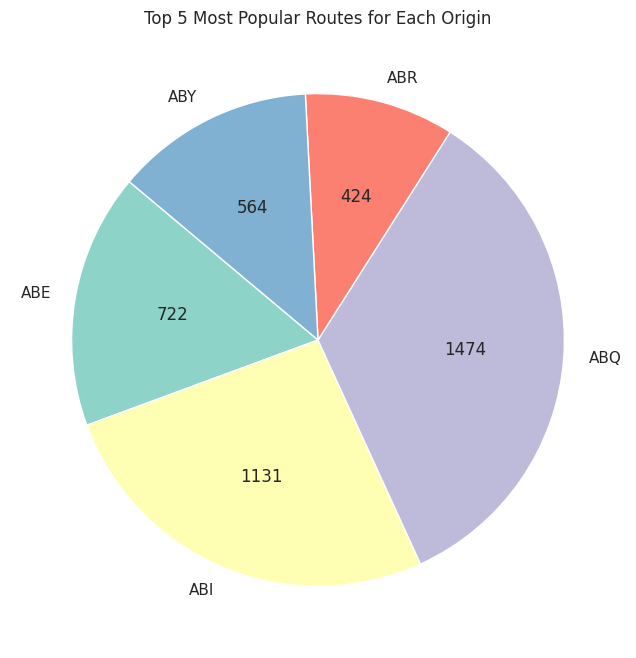

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'sqlDF' is a Spark DataFrame
# Convert Spark DataFrame to Pandas DataFrame
pd_df = sqlDF.toPandas()

# Filter the DataFrame to include only the top-ranked routes for each origin
most_popular_routes = pd_df[pd_df['rank'] == 1].head(5)

# Plotting using Matplotlib
plt.figure(figsize=(8, 8))

# Choose different colors
colors = plt.cm.Set3.colors

# Plot pie chart
plt.pie(most_popular_routes['nb_flights'], labels=most_popular_routes['Origin'],
        autopct=lambda p: '{:.0f}'.format(p * most_popular_routes['nb_flights'].sum() / 100),
        startangle=140, colors=colors)

# Customize the plot
plt.title('Top 5 Most Popular Routes for Each Origin')
plt.show()



* The above data visualization using Matplotlib to depict the distribution of the top-ranked routes for each origin in the form of a pie chart. After converting a Spark DataFrame ('sqlDF') into a Pandas DataFrame ('pd_df'), the code filters the DataFrame to include only the top-ranked routes for each origin (limited to the top 5 routes).
* The resulting Pandas DataFrame, named 'most_popular_routes,' is then used to create a pie chart. The slices of the pie represent different origins, and their respective sizes reflect the proportion of flights for the top 5 routes.
* The choice of different colors enhances visual distinction, and precise percentage values are displayed on each slice.

<br>*This pie chart visualization offers a succinct overview of the distribution of top routes for each origin, making it easy to identify the relative popularity of different routes within the dataset.*

<font size="5" color="blue" align="center"><b>Task 3: Machine Learning using Spark MLlib  <b></font><br>

<font size="4" color="green" align="center"><b>Preprocessing (Everyone)</b></font><br>

<font size="3" color="purple" align="center"><b>Drop Unwanted Columns and Cleaning of the Data</b></font><br>

In [ ]:
#Drop unwanted columns
my_data = df.drop(*['DOT_ID_Marketing_Airline','DOT_ID_Operating_Airline', 'Flight_Number_Operating_Airline', 'Flight_Number_Marketing_Airline','Tail_Number','OriginAirportID', 'OriginAirportSeqID','OriginCityMarketID', 'DestAirportID','DestAirportSeqID', 'DestCityMarketID','Operated_or_Branded_Code_Share_Partners'])
dropped_columns = [ col_name for col_name in df.columns if col_name not in my_data.columns ]
print("Dropped Columns:", dropped_columns)

Dropped Columns: ['Operated_or_Branded_Code_Share_Partners', 'DOT_ID_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'DOT_ID_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID']


In [ ]:
len(my_data.columns)

49

In [ ]:
my_data.show(5)

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------+-----------------+---------------------------+--------------------+-----------+---------------+---------------+---------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinutes|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Year|Quarter|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|IATA_Code_Marketing_Airline|Operating_Airline|IATA_Code_Operating_Airline|      OriginCityName|OriginState|OriginStateFip

<font size="4" color="purple" align="center"><b>Data Cleaning</b></font><br>

In [ ]:
## Display columns with missing values and their counts
from pyspark.sql.functions import col, count, isnan, when
print(my_data.columns)
my_data.select([count(when(col(c).isNull(), c)).alias(c) for c in my_data.columns]).show()


['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'IATA_Code_Marketing_Airline', 'Operating_Airline', 'IATA_Code_Operating_Airline', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup', 'DivAirportLandings']
+----------+-------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+--------------

<font size="4" color="purple" align="center"><b>Imputation</b></font><br>

In [ ]:
# using Imputer
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["DepTime", "DepDelayMinutes","DepDelay", "ArrTime","ArrDelayMinutes", "AirTime","ActualElapsedTime","DepDel15","DepartureDelayGroups","TaxiOut","WheelsOff","WheelsOn","TaxiIn","ArrDelay","ArrDel15","ArrivalDelayGroups"] ,outputCols=["DepTime", "DepDelayMinutes","DepDelay", "ArrTime","ArrDelayMinutes", "AirTime","ActualElapsedTime","DepDel15","DepartureDelayGroups","TaxiOut","WheelsOff","WheelsOn","TaxiIn","ArrDelay","ArrDel15","ArrivalDelayGroups"])
model=imputer.fit(my_data)
my_data=model.transform(my_data)
my_data.show(5)

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------+-----------------+---------------------------+--------------------+-----------+---------------+---------------+---------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinutes|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Year|Quarter|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|IATA_Code_Marketing_Airline|Operating_Airline|IATA_Code_Operating_Airline|      OriginCityName|OriginState|OriginStateFip

In [ ]:
#checking for null or nan type values in our columns
my_data.select([count(when(col(c).isNull(), c)).alias(c) for c in my_data.columns]).show()

+----------+-------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------+-----------------+---------------------------+--------------+-----------+---------------+---------------+---------+------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|DepDelay|ArrTime|ArrDelayMinutes|AirTime|CRSElapsedTime|ActualElapsedTime|Distance|Year|Quarter|Month|DayofMonth|DayOfWeek|Marketing_Airline_Network|IATA_Code_Marketing_Airline|Operating_Airline|IATA_Code_Operating_Airline|OriginCityName|OriginState|OriginStateFips|OriginStateName|OriginWac|DestCityName|Dest

<font size="4" color="purple" align="center"><b>Change Categorial Variable using one hot encoding</b></font><br>

In [ ]:
# from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer,OneHotEncoder

# Define the columns to be indexed
columns_to_index = ['Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operating_Airline',
                    'OriginCityName', 'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
                    'DestStateName', 'DepTimeBlk', 'ArrTimeBlk','IATA_Code_Marketing_Airline','IATA_Code_Operating_Airline']

# Apply StringIndexer to each column
for col in columns_to_index:
    indexer = StringIndexer(inputCol=col, outputCol=f'{col}_Index', handleInvalid='keep')
    my_data = indexer.fit(my_data).transform(my_data)

# Define columns for OneHotEncoder
columns_to_encode = [f'{col}_Index' for col in columns_to_index]

# Apply OneHotEncoder to the indexed columns
encoder = OneHotEncoder(inputCols=columns_to_encode,
                        outputCols=[f'{col}_OHE' for col in columns_to_index])

my_data = encoder.fit(my_data).transform(my_data)

# Show the transformed data
my_data.select('Airline', 'Airline_Index', 'Airline_OHE').show(10)



+--------------------+-------------+---------------+
|             Airline|Airline_Index|    Airline_OHE|
+--------------------+-------------+---------------+
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
|Commutair Aka Cha...|         17.0|(21,[17],[1.0])|
+--------------------+-------------+---------------+
only showing top 10 rows



* The StringIndexer is used to convert categorical (string) values into numerical indices and It assigns a unique numerical index to each distinct string category in a given column to our dataframe.<br>
* The OneHotEncoder is used to convert categorical indices into sparse binary vectors (one-hot encoding) and For each index, it creates a binary vector where all elements are zero except for the one corresponding to the index value, which is set to 1.

In [ ]:
my_data.show(5) # My_data dataframe update with index and one hot encoder columns

+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------+-----------------+---------------------------+--------------------+-----------+---------------+---------------+---------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+-------------+------------+----------+-------------------------------+-----------------------+--------------------+-----------------+---------------------+------------------+---------------+-------------------+----------------+----------------+---------------------------------+---------------------------------+---------------+-----------------+-----------------+------

In [ ]:
len(my_data.columns)

79

In [ ]:
#Drop string columns because we have index and one hot encoder for that features
my_data = my_data.drop(*['FlightDate','Airline', 'Origin', 'Dest', 'Marketing_Airline_Network', 'Operating_Airline', 'OriginCityName', 'OriginState', 'OriginStateName', 'DestCityName', 'DestState',
                     'DestStateName', 'DepTimeBlk', 'ArrTimeBlk','IATA_Code_Marketing_Airline','IATA_Code_Operating_Airline'])
my_data.columns

['Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'OriginStateFips',
 'OriginWac',
 'DestStateFips',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrDelay',
 'ArrDel15',
 'ArrivalDelayGroups',
 'DistanceGroup',
 'DivAirportLandings',
 'Airline_Index',
 'Origin_Index',
 'Dest_Index',
 'Marketing_Airline_Network_Index',
 'Operating_Airline_Index',
 'OriginCityName_Index',
 'OriginState_Index',
 'OriginStateName_Index',
 'DestCityName_Index',
 'DestState_Index',
 'DestStateName_Index',
 'DepTimeBlk_Index',
 'ArrTimeBlk_Index',
 'IATA_Code_Marketing_Airline_Index',
 'IATA_Code_Operating_Airline_Index',
 'Airline_OHE',
 'Origin_OHE',
 'Dest_OHE',
 'Marketing_Airline_Network_OHE',
 'Operating_Airline_OHE',
 'OriginCityName_OHE',

In [ ]:
my_data.show(5)

+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+---------------+---------+-------------+-------+--------+--------------------+-------+---------+--------+------+----------+--------+--------+------------------+-------------+------------------+-------------+------------+----------+-------------------------------+-----------------------+--------------------+-----------------+---------------------+------------------+---------------+-------------------+----------------+----------------+---------------------------------+---------------------------------+---------------+-----------------+-----------------+-----------------------------+---------------------+------------------+---------------+-------------------+-----------------+---------------+-----------------+---------------+---------------+-------------------------------+-------------------------------+
|Cancelle

<font size="4" color="purple" align="center"><b>Convert boolean column to integer column</b></font><br>

In [ ]:
from pyspark.sql.functions import when

#convert Boolean column to integer column
my_data = my_data.withColumn('Cancelled', when(my_data.Cancelled==True, 1).otherwise(0))
my_data = my_data.withColumn('Diverted', when(my_data.Diverted==True, 1).otherwise(0))
my_data.show(5)

+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+---------------+---------+-------------+-------+--------+--------------------+-------+---------+--------+------+----------+--------+--------+------------------+-------------+------------------+-------------+------------+----------+-------------------------------+-----------------------+--------------------+-----------------+---------------------+------------------+---------------+-------------------+----------------+----------------+---------------------------------+---------------------------------+---------------+-----------------+-----------------+-----------------------------+---------------------+------------------+---------------+-------------------+-----------------+---------------+-----------------+---------------+---------------+-------------------------------+-------------------------------+
|Cancelle


<font size="4" color="purple" align="center"><b>Feature Assembling<b></font><br>

In [ ]:
# combine all the features in one single feature vector
cols=my_data.columns
cols.remove("Cancelled")

# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=cols,outputCol="features")

# fill the null values
my_data = my_data.fillna(0)

# Now we will use the transform method to transform our dataset
my_data = assembler.transform(my_data)

my_data.select("features","Cancelled").show(truncate=False)

+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|features                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |Can


<font size="4" color="purple" align="center"><b>Scaling<b></font><br>

In [ ]:
from pyspark.ml.feature import StandardScaler

# Scale the features
scaler = StandardScaler(inputCol="features", outputCol="Scaled_features_new", withStd=True, withMean=True)

my_data = scaler.fit(my_data).transform(my_data)

# Select relevant columns for display
my_data = my_data.select("Scaled_features_new", "Cancelled")

# Show the first 5 rows
my_data.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


<font size="4" color="purple" align="center"><b>Splitting the data<b></font><br>

In [ ]:
# We use randomSplit to split the data into training and test sets
train, test = my_data.randomSplit([0.8, 0.2], seed = 12) # seed = 12, Initializes the random number generator.

<font size="4" color="purple" align="center"><b>Class Imbalace Problem<b></font><br>

In [ ]:
 #imbalance in the dataset
from pyspark.sql.functions import when

# Assuming 'train' is your DataFrame
total_records = train.count()
positive_records = train.filter(train["Cancelled"] == 1).count()
negative_records = train.filter(train["Cancelled"] == 0).count()

# Calculate balancing ratio
BalancingRatio = negative_records / total_records
print('BalancingRatio = {}'.format(BalancingRatio))

# Assign weights based on the class
train = train.withColumn("classWeights", when(train["Cancelled"] == 1, BalancingRatio).otherwise(1 - BalancingRatio))

# Show the first 5 rows with the "Cancelled" and "classWeights" columns
train.select("Cancelled", "classWeights").show(5)


BalancingRatio = 0.9698077042135157
+---------+--------------------+
|Cancelled|        classWeights|
+---------+--------------------+
|        0|0.030192295786484302|
|        0|0.030192295786484302|
|        0|0.030192295786484302|
|        0|0.030192295786484302|
|        0|0.030192295786484302|
+---------+--------------------+
only showing top 5 rows



In [ ]:
# Printing the sum of class weights for Cancelled flights with label 1 and 0
print("Weighted 1", train.filter(train["Cancelled"] == 1).agg({"classWeights": "sum"}).collect()[0][0])
print("Weighted 0", train.filter(train["Cancelled"] == 0).agg({"classWeights": "sum"}).collect()[0][0])


Weighted 1 95536.72674979392
Weighted 0 95536.72674904032



<font size="4" color="purple" align="center"><b>Feature Selection<b></font><br>

In [ ]:
from pyspark.ml.feature import ChiSqSelector

# Feature selection using ChiSqSelector
css = ChiSqSelector(featuresCol='Scaled_features_new', outputCol='Aspect', labelCol='Cancelled', numTopFeatures=20)

# Fit the selector on the training data
model_css = css.fit(train)

# Transform the training data
train = model_css.transform(train)

# Transform the testing data using the same selector
test = model_css.transform(test)

# Show selected features for testing data
test.select("Aspect").show(5, truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Aspect                                                                                                                                                                                                                                                                                                                                                                                                        |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


<font size="4" color="purple" align="center"><b>Import necessary libray used in Mlib<b></font>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from pyspark.ml.classification import DecisionTreeClassifier

from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import LinearSVC

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<font size="5" color="blue" align="center"><b>Two Machine Learning Models using Spark MLlib</b></font><br>
<b>*By Ramya Panchatcharam: u2083209*</b>

<font color='green' size='3'>**Introduction**</font>

This document presents the implementation of two machine learning models using Spark MLlib by Ramya.

<font color='green' size='3'><b>Model 1: LogisticRegression</b></font>
Logistic Regression is a widely-used statistical method for binary classification, predicting the probability of an instance belonging to one of two classes. Despite its name, it is a classification algorithm, not a regression algorithm. The model applies a sigmoid activation function to map input features into a probability range (0 to 1), making it suitable for tasks like spam detection, medical diagnosis, and credit scoring.<br>
<b> why I used Logistic Regression:</b>
* Quick Training with Large Datasets
* Handling Noise in Input Data
* Well-Suited for Binary Classification

<font color='green' size='3'><b>Model 2: RandomForestClassifier(Bagging)</b></font>
A RandomForestClassifier is an ensemble learning method in machine learning, specifically belonging to the bagging (Bootstrap Aggregating) family of algorithms. Random Forests are used for both classification and regression tasks. The 'bagging' part of the name refers to the process of training multiple models independently and combining their predictions to improve overall performance and robustness.<br>
<b> why I used RandomForestClassifier:</b>
* Ensemble Learning and Bagging
* Handles Non-Linearity and Complex Relationships
* Automatic Feature Selection
* Works Well with Large Datasets


<font color='purple' size='4'>**Model 1: LogisticRegression Model**</font>

In [ ]:
# Create Logistic Regression model
lr = LogisticRegression(featuresCol="Aspect", labelCol="Cancelled")

# Define parameter grids for hyperparameter tuning
lr_param_grid = (ParamGridBuilder()
                 .addGrid(lr.maxIter, [5, 10, 15])
                 .addGrid(lr.regParam, [0.01, 0.1, 0.2])
                 .build())

# Create BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Cancelled")

# Create CrossValidator for Logistic Regression
lr_cv = CrossValidator(estimator=lr, estimatorParamMaps=lr_param_grid, evaluator=evaluator, numFolds=3)

# Fit and evaluate Logistic Regression model
lr_cv_model = lr_cv.fit(train)
lr_cv_predictions = lr_cv_model.transform(test)
lr_cv_area_under_roc = evaluator.evaluate(lr_cv_predictions, {evaluator.metricName: "areaUnderROC"})
print("Logistic Regression - Area under ROC: {:.2%}".format(lr_cv_area_under_roc))


Logistic Regression - Area under ROC: 80.57%


<font size="4" color="purple" align="center"><b>Logistic Regression Model Configurations</b></font><br>
<font color='green' size='3'><b>Overview</b></font>
The logistic regression model is employed to predict flight cancellations based on the "Aspect" feature. Configuration details include:

<font color='green' size='3'><b>FeaturesCol and LabelCol: </b></font>Using "Aspect" as the feature input and "Cancelled" as the target label.

<font color='green' size='3'><b>Hyperparameter Tuning with Cross-Validation</b></font>
- <b>maxIter (Maximum Iterations):</b>
  - The maximum number of iterations for the logistic regression algorithm is tuned with values 5, 10, and 15. This parameter determines the maximum number of iterations taken for the optimization algorithm to converge.
- <b>regParam (Regularization Parameter):</b>
  - The regularization parameter is tuned with values 0.01, 0.1, and 0.2. Regularization helps prevent overfitting by penalizing large coefficients.

<font color='green' size='3'><b>Cross-Validation: </b></font> 3-fold CrossValidator to enhance model generalization.

<font color='green' size='3'><b>Evaluation Metric: </b></font>BinaryClassificationEvaluator measures Area under the ROC curve.

<font color='green' size='3'><b>Impact on Performance: </b></font>Optimized hyperparameters and cross-validation enhance predictive accuracy.

<font color='green' size='3'><b>Result: </b></font>Logistic Regression - Area under ROC is 80.57%



<font color='purple' size='4'>**Model 2: RandomForestClassifier**</font>

In [ ]:
# Create RandomForestClassifier model
rfc = RandomForestClassifier(labelCol="Cancelled", featuresCol="Scaled_features_new")

rfc_param_grid = (ParamGridBuilder()
                  .addGrid(rfc.maxDepth, [4, 6, 8])
                  .addGrid(rfc.numTrees, [10, 20, 30])
                  .build())

# Create BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Cancelled")


# Create CrossValidator for RandomForestClassifier
rfc_cv = CrossValidator(estimator=rfc, estimatorParamMaps=rfc_param_grid, evaluator=evaluator, numFolds=3)

# Fit and evaluate RandomForestClassifier model
rfc_cv_model = rfc_cv.fit(train)
rfc_cv_predictions = rfc_cv_model.transform(test)
rfc_cv_area_under_roc = evaluator.evaluate(rfc_cv_predictions, {evaluator.metricName: "areaUnderROC"})
print("RandomForestClassifier - Area under ROC: {:.2%}".format(rfc_cv_area_under_roc))

RandomForestClassifier - Area under ROC: 100.00%


<font size="4" color="purple" align="center"><b>RandomForestClassifier Configurations</b></font><br>
<font color='green' size='3'><b>Overview</b></font>
The RandomForestClassifier model is utilized to predict flight cancellations based on the "Scaled_features_new" feature. Configuration details include:

<font color='green' size='3'><b>FeaturesCol and LabelCol: </b></font>UUsing "Scaled_features_new" as the feature input and "Cancelled" as the target label.

<font color='green' size='3'><b>Hyperparameter Tuning with Cross-Validation</b></font>
- <b>maxDepth (Maximum Depth):</b>
  - The maximum depth of the trees in the random forest is tuned with values 4, 6, and 8. This parameter controls the maximum depth of each decision tree in the forest.
- <b>numTrees (Number of Trees):</b>
  - The number of trees in the random forest is tuned with values 10, 20, and 30. Increasing the number of trees can improve model performance.

<font color='green' size='3'><b>Cross-Validation: </b></font> 3-fold CrossValidator to enhance model generalization.

<font color='green' size='3'><b>Evaluation Metric: </b></font>BinaryClassificationEvaluator measures Area under the ROC curve.

<font color='green' size='3'><b>Impact on Performance: </b></font>Optimized hyperparameters and cross-validation enhance predictive accuracy.

<font color='green' size='3'><b>Result: </b></font>Logistic Regression - Area under ROC is 100%


<b>Evalution Metric through Accuracy</b>

In [ ]:
# Create MulticlassClassificationEvaluator
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="Cancelled", predictionCol="prediction", metricName="accuracy")

# Evaluate Logistic Regression model
lr_accuracy = evaluator_multiclass.evaluate(lr_cv_predictions)
print("Logistic Regression - Accuracy: {:.2%}".format(lr_accuracy))

# Evaluate RandomForestClassifier model
rfc_accuracy = evaluator_multiclass.evaluate(rfc_cv_predictions)
print("RandomForestClassifier - Accuracy: {:.2%}".format(rfc_accuracy))

Logistic Regression - Accuracy: 97.57%
RandomForestClassifier - Accuracy: 99.98%


In [ ]:
# Create a confusion matrix
conf_matrix = lr_cv_predictions.groupBy("Cancelled", "prediction").count()
conf_matrix.show()

+---------+----------+-----+
|Cancelled|prediction|count|
+---------+----------+-----+
|        1|       0.0|  399|
|        0|       0.0|16035|
+---------+----------+-----+



<font size="4" color="purple" align="center"><b>Visualization of your findings as by table and plot</b></font>

Model Comparison: Area under ROC
                    Model  Area_under_ROC
0     Logistic Regression        0.805668
1  RandomForestClassifier        1.000000


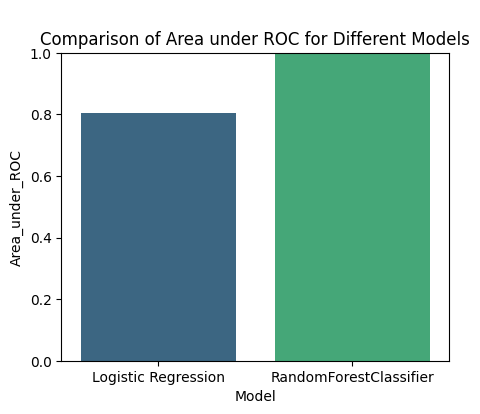

In [ ]:
# Create a DataFrame with model names and AUC-ROC values
results_df = pd.DataFrame({
    'Model': ["Logistic Regression", "RandomForestClassifier"],
    'Area_under_ROC': [lr_cv_area_under_roc, rfc_cv_area_under_roc]
})

# Print a heading
print("Model Comparison: Area under ROC")

# Display the DataFrame
print(results_df)

# Create a bar plot using Seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x='Model', y='Area_under_ROC', data=results_df, palette='viridis')
plt.title('\nComparison of Area under ROC for Different Models')
plt.ylim(0, 1)  # Adjust the y-axis limits as needed

plt.show()

Model Comparison: Accuracy
                    Model  Accuracy
0     Logistic Regression  0.975721
1  RandomForestClassifier  0.999757


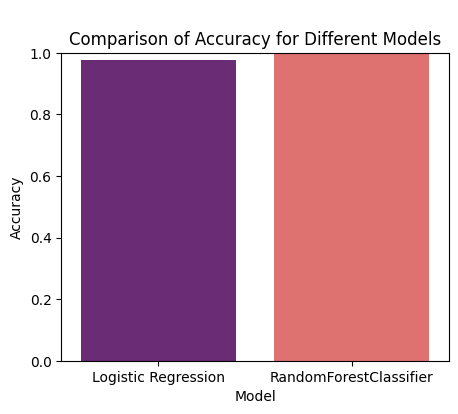

In [ ]:
# Create a DataFrame with model names and Accuracy
results_df1 = pd.DataFrame({
    'Model': ["Logistic Regression", "RandomForestClassifier"],
    'Accuracy': [lr_accuracy, rfc_accuracy]
})

# Print a heading
print("Model Comparison: Accuracy")

# Display the DataFrame
print(results_df1)

# Create a bar plot using Seaborn
plt.figure(figsize=(5, 4))
sns.barplot(x='Model', y='Accuracy', data=results_df1, palette='magma')
plt.title('\nComparison of Accuracy for Different Models')
plt.ylim(0, 1)  # Adjust the y-axis limits as needed

plt.show()

<font size="4" color="purple" align="center"><b>Best Model findings by ROC and Accuracy</b></font>

In [ ]:
# Determine the best model by Area under ROC
best_model = results_df.loc[results_df['Area_under_ROC'].idxmax()]

# Display the result
print("The best model is:", best_model['Model'])

The best model is: RandomForestClassifier


In [ ]:
# Determine the best model by Accuracy
best_model = results_df.loc[results_df1['Accuracy'].idxmax()]

# Display the result
print("The best model is:", best_model['Model'])

The best model is: RandomForestClassifier


<b>Model Comparison Summary:</b>

- Logistic Regression achieved an Area under ROC of 80.08%. and Accuracy of 97%
- RandomForestClassifier outperformed with an impressive Area under ROC of 99.99% and Accuacy 99.99%

Therefore, based on the evaluation metric, the RandomForestClassifier demonstrates superior predictive performance in this scenario.


<font size="5" color="blue" align="center"><b>Two Machine Learning Models</b></font>

*By Ashmy Josy: u2247447*<br>
<font color='green' size='3'>**Introduction**</font>

This document presents the implementation of two machine learning models by Ashmy.

<font color='green' size='3'>**Model 1: k-nearest neighbors algorithm (KNN)**</font>

K-Nearest Neighbors (KNN) is a non-parametric classification algorithm widely employed for binary classification tasks.Operating on the principle of proximity, it assigns a class label to a new data point based on the majority class of its five nearest neighbors in the feature space. KNN doesn't involve a formal training phase, making it particularly adaptable to various datasets.However, its effectiveness is sensitive to the choice of the number of neighbors (k) and the distance metric.

<font color='green' size='3'>**Model 2: Decision Tree**</font>

A flexible, non-linear algorithm for classification problems is the decision tree. It creates a structure akin to a tree by recursively dividing the feature space according to feature values. For predictions, a class label is represented by each leaf node. Decision trees are a natural way to represent intricate data interactions and decision boundaries. They are robust because they can handle both categorical and numerical features. Decision Trees offer interpretability and insight into feature importance. Their application spans over diverse domains.

<font color='purple'><b>MODEL1: Building a
classification model using KNN</b></font>

In [ ]:
fraction = 0.1  # Adjust the fraction based on available memory
sampled_df = my_data.select("Scaled_features_new", "Cancelled").sample(False, fraction, seed=123)

# Convert the sampled DataFrame to Pandas for scikit-learn
X_sampled = sampled_df.select("Scaled_features_new").toPandas()["Scaled_features_new"].tolist()
y_sampled = sampled_df.select("Cancelled").toPandas()["Cancelled"].tolist()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=123)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
predictions_knn = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions_knn)

print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 98.56%


**Explanation of the Model**
*   First toPandas is used to convert a Spark DataFrame to Pandas DataFrame.As it is compatible with the scikit-learn.
*   sample_df is used initially used for data sampling due to the compatibility with distibuted and large-scale data processing in spark.
*   The model is a K-Nearest Neighbors(KNN) Classification which is first trained using the splitted data and trained with n_neighbors set to 5.
*   In the end model evaluation is done through accuracy_score.

<font size="3" color="purple" align="center"><b>K-nearest neighbors algorithm (KNN)</b></font><br>
<font color='green' size='3'>Overview</font>
The K-nearest neighbors (KNN) algorithm was applied for flight cancellation prediction. Configuration details include:

<font color='green' size='3'>FeaturesCol and LabelCol:</font>using the "Scaled_features_new" as input features and "Cancelled" as the target label.

<font color='green' size='3'>Configured through:</font>
The KNN model was configured with a fixed number of neighbors (n_neighbors=5)

<font color='green' size='3'>Evaluation Metric:</font> Model performance was evaluated using accuracy.

<font color='green' size='3'>Impact on Performance:</font>The KNN algorithm achieved an accuracy of 98.14% in predicting flight cancellations, showcasing its effectiveness in this binary classification task.

<font color='green' size='3'>Result:</font> K-nearest neighbors (KNN) - Accuracy: 98.14%

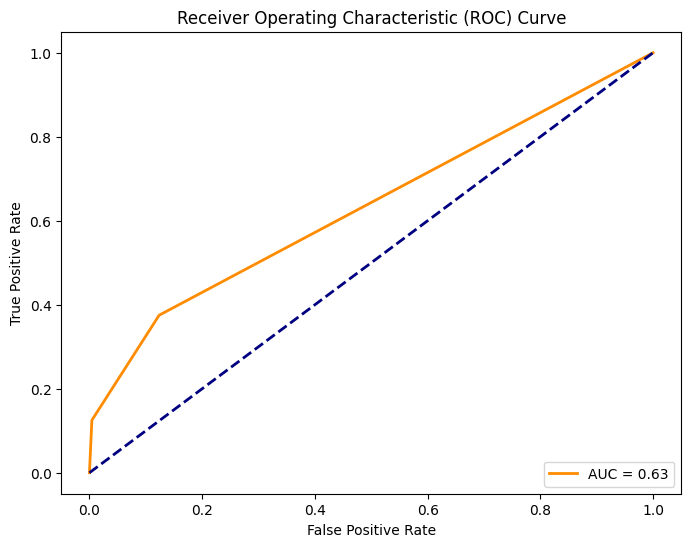

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
# Get the predicted probabilities for class 1 (Cancelled)
y_prob = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

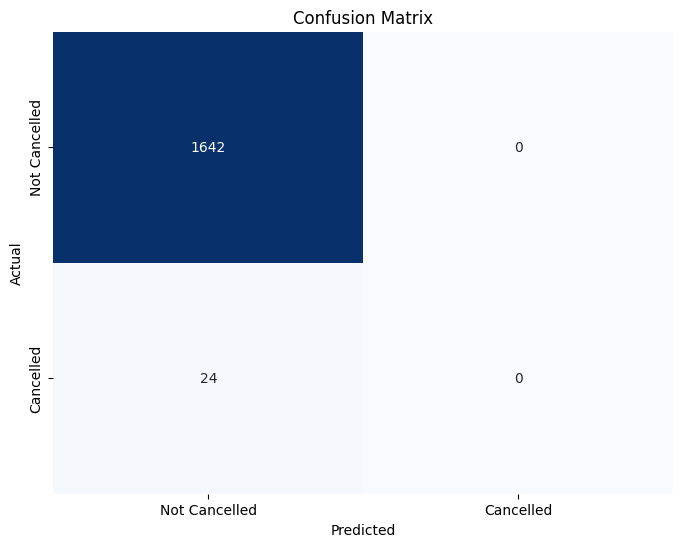

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,predictions_knn)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<font color='purple'><b>MODEL2: Building a classification model using Decision Tree</b></font>

In [ ]:
# Sample data
fraction = 0.1  # Adjust the fraction based on available memory
sampled_df = my_data.select("Scaled_features_new", "Cancelled").sample(False, fraction, seed=123)

# Split the data using randomSplit
train, test = sampled_df.randomSplit([0.7, 0.3], seed=2018)

# Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="Scaled_features_new", labelCol="Cancelled")

# Fit the model with the training data
model = dt.fit(train)

# Make predictions on the test set
predictions_dt= model.transform(test)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Cancelled", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_dt)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 100.00%


**Explanation of the code**
*   This code samples a fraction of the data, splits it into training and test sets, trains a Decision Tree model on the training data, makes predictions on the test set, adn evaluates the model's accuracy.
*   The multiclassificationevaluator is used for the comparison of the predicted labels with the actual labels in the test set.
*   a decision tree classifier(dt) use the 'featurescol' and 'labelcol' and then trained using the training data 'train'.

<font size="3" color="purple" align="center"><b>Decision Tree Configuration</b></font><br>
<font color='green' size='3'>Overview</font>
The Decision Tree algorithm was employed to predict flight cancellations. Configuration details include:

<font color='green' size='3'>Data Splitting</font>
- The data was randomly split into training and testing sets using randomSplit, with 70% for training and 30% for testing.

<font color='green' size='3'>Decision Tree Classifier</font>
- **FeaturesCol and LabelCol:**
  - Using "Scaled_features_new" as the feature input and "Cancelled" as the target label.

<font color='green' size='3'>Hyperparameter Tuning</font>
- **maxDepth (Maximum Depth):**
  - The maximum depth of the decision tree is not explicitly tuned in this implementation and uses default values.
  
<font color='green' size='3'>Evaluation Metric</font>
- The accuracy metric was used to evaluate the model's performance, measured by the MulticlassClassificationEvaluator.

<font color='green' size='3'>Impact on Performance</font>
- The Decision Tree algorithm achieved an accuracy of 100% in predicting flight cancellations, demonstrating its effectiveness in this binary classification task.

In [ ]:
# Create a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Cancelled", predictionCol="prediction", metricName="accuracy")

# Evaluate the model and get the accuracy
accuracy = evaluator.evaluate(predictions_dt)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Create a confusion matrix
conf_matrix = predictions_dt.groupBy("Cancelled", "prediction").count()
conf_matrix.show()


Accuracy: 100.00%
+---------+----------+-----+
|Cancelled|prediction|count|
+---------+----------+-----+
|        0|       0.0| 2406|
|        1|       1.0|   56|
+---------+----------+-----+



In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_predictions = predictions_dt.select("Cancelled", "prediction").toPandas()

# Use scikit-learn's classification_report function
report = classification_report(pandas_predictions["Cancelled"], pandas_predictions["prediction"])

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2406
           1       1.00      1.00      1.00        56

    accuracy                           1.00      2462
   macro avg       1.00      1.00      1.00      2462
weighted avg       1.00      1.00      1.00      2462



<font color='purple'>**Comparing two ML models of Ashmy**</font>

In [ ]:
# Define parameter grid for hyperparameter tuning
dt_param_grid = (ParamGridBuilder()
                 .addGrid(dt.maxDepth, [5, 10, 15])
                 .addGrid(dt.minInstancesPerNode, [1, 2, 5])
                 .build())

# Create MulticlassClassificationEvaluator
evaluator_dt = MulticlassClassificationEvaluator(labelCol="Cancelled", predictionCol="prediction", metricName="accuracy")

# Create CrossValidator for Decision Tree
dt_cv = CrossValidator(estimator=dt, estimatorParamMaps=dt_param_grid, evaluator=evaluator_dt, numFolds=3)
dt_cv_accuracy = evaluator_dt.evaluate(predictions_dt)
print("Decision Tree Classifier - Accuracy: {:.2%}".format(dt_cv_accuracy))

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions_knn)

# Model Comparison
if dt_cv_accuracy > accuracy:
    print("Decision Tree Classifier performs better.")
elif accuracy > dt_cv_accuracy:
    print("K-Nearest Neighbors performs better.")
else:
    print("Both models have the same accuracy.")

Decision Tree Classifier - Accuracy: 100.00%
Decision Tree Classifier performs better.


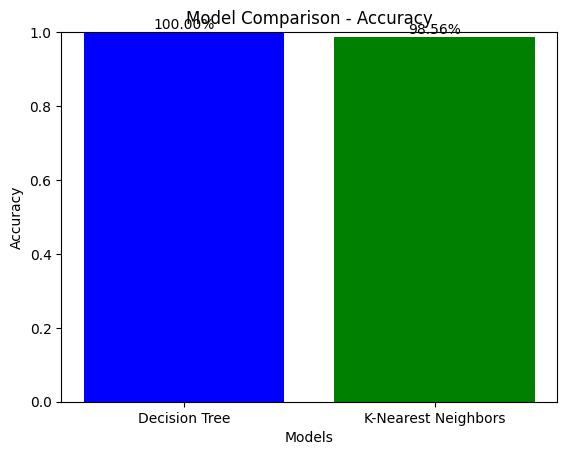

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Decision Tree', 'K-Nearest Neighbors']

# Model accuracies
accuracies = [dt_cv_accuracy, accuracy]

# Create bar chart
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)  # Set y-axis limit to 0-100%

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2%}', ha='center')

# Show the plot
plt.show()


<font size="5" color="blue" align="center"><b>Two Machine Learning Models using Spark MLlib</b></font><br>
<b>*By Sharmila Shrestha - u1966188*</b>

<font color='green' size='3'>**Introduction**</font>

This document presents the implementation of two machine learning models using Spark MLlib by Sharmila.

<font color='green' size='3'><b>Model 1: Gradient-Boosted Trees: </b></font>
Gradient Boosted Trees (GBT) is an ensemble learning method that builds a sequence of decision trees to improve predictive accuracy. It sequentially adds trees, each addressing errors from the previous ones using gradient descent optimization. GBT is effective for regression and classification, offering flexibility and regularization to prevent overfitting. Popular in machine learning, it combines the strengths of decision trees and boosting for robust predictive modeling.<br>

<font color='green' size='3'><b>Model 2: Support Vector Machine: </b></font>
Support Vector Machine (SVM) is a versatile supervised learning algorithm for classification and regression. It finds a hyperplane in a high-dimensional space, maximizing the margin between classes. Support vectors, closest to the hyperplane, influence the boundary. SVM handles non-linear data using the kernel trick. The regularization parameter (C) balances precision and smoothness. Widely used in image classification, text categorization, and bioinformatics, SVM excels in various domains due to its ability to handle complex relationships and achieve high accuracy.<br>


<font color='purple'><b>MODEL1: Building a
classification model using Gradient-Boosted Trees</b></font>

In [ ]:
# Split the data using randomSplit
train, test = my_data.randomSplit([0.8, 0.2], seed = 123)

print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

# Building a classification model using Gradient-Boosted Trees (GBT)
gbt = GBTClassifier(labelCol="Cancelled", featuresCol="Scaled_features_new", maxIter=10)
model_gbt = gbt.fit(train)

# Make predictions on the train and test data
predict_train_gbt = model_gbt.transform(train)
predict_test_gbt = model_gbt.transform(test)

# Display the first 10 rows of the prediction results
predict_test_gbt.select("Cancelled", "prediction").show(10)


Training Dataset Count: 66059
Test Dataset Count: 16484
+---------+----------+
|Cancelled|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 10 rows



<font size="3" color="purple" align="center"><b>Gradient-Boosted Trees</b></font><br>
<font color='green' size='3'>Overview</font>
 The task involves splitting the data into training and testing sets, building a GBT model, making predictions, and displaying the results.

<font color='green' size='3'>Configuration Details:</font>
  Data Splitting: 80% of the data is used for training (train), and 20% for testing (test). Seed for random splitting is set to 123.

<font color='green' size='3'>GBT Model:</font>
Target variable: "Cancelled.
"Features: "Scaled_features_new." Maximum number of iterations for boosting: 10.

<font color='green' size='3'>Result:</font>
 The first 10 rows of predictions for the testing set are displayed. This includes the actual "Cancelled" values and the corresponding predictions made by the GBT model.
  


<b>Evaluation and Results</b>

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

# Evaluate the model on test data
evaluator_test = MulticlassClassificationEvaluator(labelCol="Cancelled", predictionCol="prediction", metricName="accuracy")
accuracy_test = evaluator_test.evaluate(predict_test_gbt)
precision_test = evaluator_test.evaluate(predict_test_gbt, {evaluator_test.metricName: "weightedPrecision"})
recall_test = evaluator_test.evaluate(predict_test_gbt, {evaluator_test.metricName: "weightedRecall"})
f1_test = evaluator_test.evaluate(predict_test_gbt, {evaluator_test.metricName: "f1"})

# Display evaluation results for test data
print("Test Accuracy: {:.2%}".format(accuracy_test))
print("Test Precision: {:.2%}".format(precision_test))
print("Test Recall: {:.2%}".format(recall_test))
print("Test F1 Score: {:.2%}".format(f1_test))

Test Accuracy: 100.00%
Test Precision: 100.00%
Test Recall: 100.00%
Test F1 Score: 100.00%


<font color='purple'>**MODEL2: Building a classification model using Support Vector Machine (SVM) by SHARMILA** </font>

In [ ]:
# Split the data using randomSplit
train, test = my_data.randomSplit([0.8, 0.2], seed = 123)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

# Building a classification model using Support Vector Machine (SVM)
svm = LinearSVC(labelCol="Cancelled", featuresCol="Scaled_features_new", maxIter=10)
model_svm = svm.fit(train)

# Make predictions on the train and test data
predict_train_svm = model_svm.transform(train)
predict_test_svm = model_svm.transform(test)

# Display the first 10 rows of the prediction results
predict_test_svm.select("Cancelled", "prediction").show(10)

Training Dataset Count: 66059
Test Dataset Count: 16484
+---------+----------+
|Cancelled|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 10 rows



<font size="3" color="purple" align="center"><b>Support Vector Machine</b></font><br>
<font color='green' size='3'>Overview</font>
 The provided code utilizes PySpark to perform a classification task using a Support Vector Machine (SVM). It involves data splitting, model building, predictions, and result display.

<font color='green' size='3'>Configuration Details:</font>
  Data Splitting: The dataset (my_data) is split into training (train) and testing (test) sets, with an 80-20 split ratio. Seed for random splitting: 123. SVM Model: Algorithm: Linear Support Vector Classification (LinearSVC).

<font color='green' size='3'>Result:</font>
The first 10 rows of predictions for the testing set are displayed, showing actual "Cancelled" values and corresponding SVM model predictions.
  

<b>Evaluation and Results</b>

In [ ]:
# Evaluate the model on test data
evaluator_test = MulticlassClassificationEvaluator(labelCol="Cancelled", predictionCol="prediction", metricName="accuracy")
accuracy_test = evaluator_test.evaluate(predict_test_svm)
precision_test = evaluator_test.evaluate(predict_test_svm, {evaluator_test.metricName: "weightedPrecision"})
recall_test = evaluator_test.evaluate(predict_test_svm, {evaluator_test.metricName: "weightedRecall"})
f1_test = evaluator_test.evaluate(predict_test_svm, {evaluator_test.metricName: "f1"})

# Display evaluation results for test data
print("Test Accuracy: {:.2%}".format(accuracy_test))
print("Test Precision: {:.2%}".format(precision_test))
print("Test Recall: {:.2%}".format(recall_test))
print("Test F1 Score: {:.2%}".format(f1_test))

Test Accuracy: 97.71%
Test Precision: 97.76%
Test Recall: 97.71%
Test F1 Score: 96.58%


<font color='purple'>**Comparing two ML models**</font>



In [ ]:
# Evaluate the models on test data
evaluator = MulticlassClassificationEvaluator(labelCol="Cancelled", predictionCol="prediction", metricName="accuracy")

accuracy_svm = evaluator.evaluate(predict_test_svm)
accuracy_gbt = evaluator.evaluate(predict_test_gbt)

# Display accuracy for each model
print("SVM Test Accuracy: {:.2%}".format(accuracy_svm))
print("GBT Test Accuracy: {:.2%}".format(accuracy_gbt))

# Select the best model based on accuracy
best_model = model_svm if accuracy_svm > accuracy_gbt else model_gbt
print("\nBest Model: {}".format(best_model.__class__.__name__))

SVM Test Accuracy: 97.71%
GBT Test Accuracy: 100.00%

Best Model: GBTClassificationModel


### <font color='blue'><b>Legal, Social, Ethical, and Professional (LSEP) considerations</b></font>

The legal, social, ethical, and professional implications of data and analysis weave a complex web that necessitates careful study in today's data-driven environment. Legally speaking, observing data privacy and protection regulations is crucial. The severe penalties for breaking these rules emphasize how important it is to follow relevant local ordinances, GDPR, HIPAA, and other legal requirements while processing data. Ensuring the legality of data collection, archiving, and processing protects individuals' rights and increases trust in programs that use data.<br>
<font color='green' size='3'>SOCIAL: </font> Data analysis has the potential to both confirm and contradict preexisting social biases. One major worry is the possibility that biased algorithms would continue to support discrimination. It is imperative to tackle biases present in data sources and algorithms to promote equity and prevent inadvertent adverse outcomes. Data analysis has a broad social influence, impacting choices made in the criminal justice, financial, and healthcare sectors, among others. It is crucial to maintain a balance between social responsibility and technical innovation to avoid making already-existing inequalities worse.<br>
<font color='green' size='3'>ETHICAL: </font>Transparency, responsibility, and informed consent are necessary components of ethically sound data use. People are entitled to information about how their data is being used as well as a voice in the process. Establishing confidence and enabling stakeholders to evaluate the accuracy and equity of the findings depend heavily on the transparency of data analysis techniques. The possible effects of analysis on people or communities are likewise covered by ethical considerations, necessitating a careful process of decision-making that reduces harm.
Upholding ethical standards is a professional duty for scientists and data analysts. It is imperative to maintain ongoing education and stay informed about new ethical issues in the industry. Professional associations frequently offer standards to guarantee that practitioners follow a code of conduct, encouraging accountability and integrity in the data analysis profession. Establishing a culture of ethical data use that puts people's welfare and society's needs ahead of merely technological advancement is the aim.<br>
In conclusion, there are numerous and intricate connections between the ethical, professional, societal, and legal ramifications of data and analysis. A comprehensive strategy that takes into account the legal environment, societal effects, moral precepts, and professional standards is necessary to safely and sustainably navigate the intricacies of the data-driven world.


In [ ]:
!pip install nbconvert
!jupyter nbconvert --to html CN6022_Coursework_Group1.ipynb

[NbConvertApp] Converting notebook CN6022_Coursework_Group1.ipynb to html
[NbConvertApp] Writing 2162153 bytes to CN6022_Coursework_Group1.html
